In [1]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sc


In [3]:
maxes = {}
sims = {}
suss = {}

MAX_COMM_SIZES = {}
ELEMENT_C_SIMILARITIES = {}
SUSCEPTIBILITIES = {}
MAX_ERR = {}
ELEMENT_ERR = {}
SUSC_ERR = {}


weightlist = np.loadtxt('./weights.txt', delimiter=",")

for i in range(3, 6):
    maxes[i] = {}
    sims[i] = {}
    suss[i] = {}
    
    MAX_COMM_SIZES[i] = np.zeros(len(weightlist))
    ELEMENT_C_SIMILARITIES[i] = np.zeros(len(weightlist))
    SUSCEPTIBILITIES[i] = np.zeros(len(weightlist))
    
    
    MAX_ERR[i] = np.zeros(len(weightlist))
    ELEMENT_ERR[i] = np.zeros(len(weightlist))
    SUSC_ERR[i] = np.zeros(len(weightlist))
    
    for k in range(0, len(weightlist)):
        max_mid = []
        el_mid = []
        sus_mid = []
        for j in range(1, 11):
            maxes[i][j] = np.loadtxt('./maxes/max{0}_{1}.txt'.format(i, j), delimiter=",")
            max_mid.append(maxes[i][j][k])
            MAX_COMM_SIZES[i][k] = np.average(max_mid)
            MAX_ERR[i][k] = np.std(max_mid)
            
            
            sims[i][j] = np.loadtxt('./sims/sim{0}_{1}.txt'.format(i, j), delimiter=",")
            el_mid.append(sims[i][j][k])
            ELEMENT_C_SIMILARITIES[i][k] = np.average(el_mid)
            ELEMENT_ERR[i][k] = np.std(el_mid)
            
            
            suss[i][j] = np.loadtxt('./suss/sus{0}_{1}.txt'.format(i, j), delimiter=",")
            sus_mid.append(suss[i][j][k])
            SUSCEPTIBILITIES[i][k] = np.average(sus_mid)
            SUSC_ERR[i][k] = np.std(sus_mid)
        
        
        
    

In [4]:
degrees = {}
sizes = {}
weights = {}
h_degrees = {}
h_groups = {}

sizes_avg = np.array([])
weights_avg = np.array([])
h_groups_avg = np.array([])

for i in range(1, 11):
    degrees[i] = ()
    h_degrees[i] = ()
    
    #degrees_avg[i] = []
    #h_degrees_avg[i] = []
    
    h_degrees[i] = (np.loadtxt('./{0}th_run/1000_0.0_linear_deg.txt'.format(i)))
    degrees[i] = (np.loadtxt('./degrees/G_deg_{0}.txt'.format(i)))
    sizes[i] = (np.loadtxt('./sizes/sizes_{0}.txt'.format(i)))
    weights[i] = (np.loadtxt('./w/w_{0}.txt'.format(i)))
    
    
    degrees_avg = np.zeros(len(degrees[i]))
    h_degrees_avg = np.zeros(len(h_degrees[i]))

    sizes_avg = np.concatenate((sizes_avg, sizes[i] ))
    hist_S, bin_edges_S = sc.histogram(sizes_avg, bins=[1,2,3,4,5,6,7,8,9,10])
    
    weights_avg = np.concatenate((weights_avg, weights[i] ))
    hist_W, bin_edges_W = sc.histogram(weights_avg, weightlist)
    
    for j in range(0, len(degrees[i])):
        degrees_avg[j] = (np.average(degrees[i][j]))
        
    for j in range(0, len(h_degrees[i])):
        h_degrees_avg[j] = (np.average(h_degrees[i][j]))
    

C:\Users\ipobo\AppData\Local\Temp\ipykernel_24840\2752471116.py:28: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_S, bin_edges_S = sc.histogram(sizes_avg, bins=[1,2,3,4,5,6,7,8,9,10])
C:\Users\ipobo\AppData\Local\Temp\ipykernel_24840\2752471116.py:31: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_W, bin_edges_W = sc.histogram(weights_avg, weightlist)


In [5]:
communitiesG = {}
lencommg = {}
h_groups_avg = np.array([])
for i in range(1, 11):
    h_groups[i] = (np.loadtxt('./{0}th_run/1000_0.0_linear_assign.txt'.format(i)))
    
    communitiesG[i] = [[] for _ in range(int(max(h_groups[i])))]
    lencommg[i] = np.zeros(int(max(h_groups[i])))
    
    for j in range(0, int(max(h_groups[i]))+1):
          #np.zeros(len(h_groups[i]))
        for k in range(0, len(h_groups[i])):
            if h_groups[i][k] == j:
                communitiesG[i][j-1].append(k+1)
                lencommg[i][j-1] = (len(communitiesG[i][j-1]))
                
    h_groups_avg = np.concatenate((h_groups_avg, lencommg[i] ))
    hist_G, bin_edges_G = sc.histogram(h_groups_avg,sorted(list(set(h_groups_avg))))

C:\Users\ipobo\AppData\Local\Temp\ipykernel_24840\2234034735.py:18: DeprecationWarning: scipy.histogram is deprecated and will be removed in SciPy 2.0.0, use numpy.histogram instead
  hist_G, bin_edges_G = sc.histogram(h_groups_avg,sorted(list(set(h_groups_avg))))


In [6]:
sorted(list(set(h_groups_avg)))

[10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 58.0,
 59.0,
 60.0,
 61.0,
 63.0,
 65.0,
 66.0,
 67.0,
 69.0,
 70.0,
 71.0,
 72.0,
 74.0,
 75.0,
 76.0,
 78.0,
 81.0,
 82.0,
 84.0,
 85.0,
 86.0,
 89.0,
 92.0,
 94.0,
 98.0,
 99.0,
 100.0]

In [7]:
lencommg

{1: array([82., 81., 65., 61., 59., 56., 52., 46., 46., 38., 37., 35., 26.,
        26., 23., 22., 22., 21., 18., 17., 15., 15., 13., 13., 12., 12.,
        12., 12., 11., 11., 11., 10., 10., 10.]),
 2: array([75., 71., 60., 55., 52., 51., 50., 50., 48., 45., 38., 36., 34.,
        30., 28., 25., 22., 20., 18., 17., 17., 17., 16., 15., 15., 13.,
        13., 13., 12., 12., 11., 11., 10.]),
 3: array([100.,  92.,  76.,  76.,  71.,  67.,  63.,  54.,  54.,  53.,  45.,
         43.,  31.,  30.,  25.,  21.,  15.,  15.,  15.,  13.,  11.,  10.,
         10.,  10.]),
 4: array([92., 72., 71., 69., 67., 55., 50., 45., 42., 39., 39., 38., 34.,
        32., 31., 25., 24., 23., 22., 20., 17., 16., 12., 12., 12., 11.,
        10., 10., 10.]),
 5: array([100.,  98.,  89.,  70.,  69.,  66.,  61.,  51.,  38.,  36.,  31.,
         27.,  27.,  25.,  23.,  20.,  19.,  19.,  16.,  15.,  15.,  14.,
         13.,  12.,  12.,  12.,  12.,  10.]),
 6: array([99., 92., 86., 74., 46., 45., 39., 37., 35., 34., 33

In [8]:
h_groups_avg


array([ 82.,  81.,  65.,  61.,  59.,  56.,  52.,  46.,  46.,  38.,  37.,
        35.,  26.,  26.,  23.,  22.,  22.,  21.,  18.,  17.,  15.,  15.,
        13.,  13.,  12.,  12.,  12.,  12.,  11.,  11.,  11.,  10.,  10.,
        10.,  75.,  71.,  60.,  55.,  52.,  51.,  50.,  50.,  48.,  45.,
        38.,  36.,  34.,  30.,  28.,  25.,  22.,  20.,  18.,  17.,  17.,
        17.,  16.,  15.,  15.,  13.,  13.,  13.,  12.,  12.,  11.,  11.,
        10., 100.,  92.,  76.,  76.,  71.,  67.,  63.,  54.,  54.,  53.,
        45.,  43.,  31.,  30.,  25.,  21.,  15.,  15.,  15.,  13.,  11.,
        10.,  10.,  10.,  92.,  72.,  71.,  69.,  67.,  55.,  50.,  45.,
        42.,  39.,  39.,  38.,  34.,  32.,  31.,  25.,  24.,  23.,  22.,
        20.,  17.,  16.,  12.,  12.,  12.,  11.,  10.,  10.,  10., 100.,
        98.,  89.,  70.,  69.,  66.,  61.,  51.,  38.,  36.,  31.,  27.,
        27.,  25.,  23.,  20.,  19.,  19.,  16.,  15.,  15.,  14.,  13.,
        12.,  12.,  12.,  12.,  10.,  99.,  92.,  8

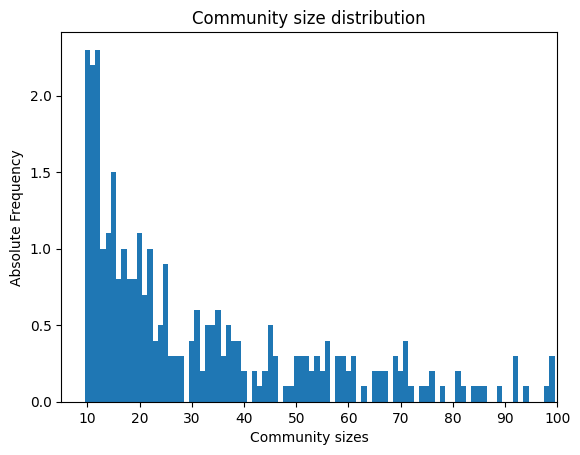

In [9]:
plt.bar(bin_edges_G[:-1], hist_G/10,  width = 1)
plt.xlim(min(bin_edges_G)-5, max(bin_edges_G)-5)
plt.xlabel("Community sizes")
plt.ylabel("Absolute Frequency")
plt.title("Community size distribution")
plt.xticks([10,20,30,40,50,60,70,80,90,100])
plt.show()

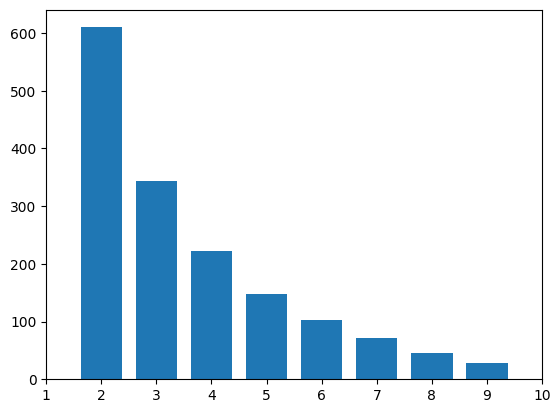

In [10]:
plt.bar(bin_edges_S[:-1], hist_S/10,  width = 0.75)
plt.xlim(min(bin_edges_S), max(bin_edges_S))
plt.show()

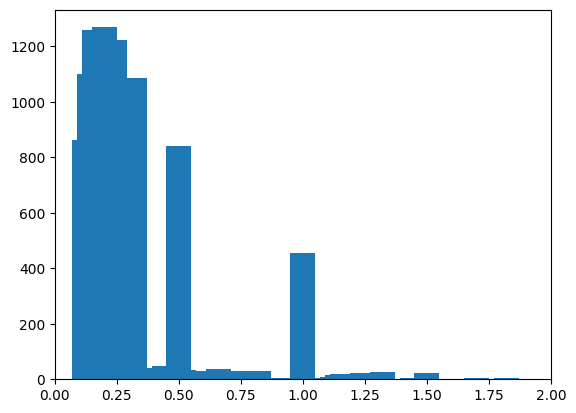

In [11]:
plt.bar(bin_edges_W[:-1], hist_W/10, width = 0.1)
plt.xlim(min(bin_edges_W), max(bin_edges_W))
plt.show()

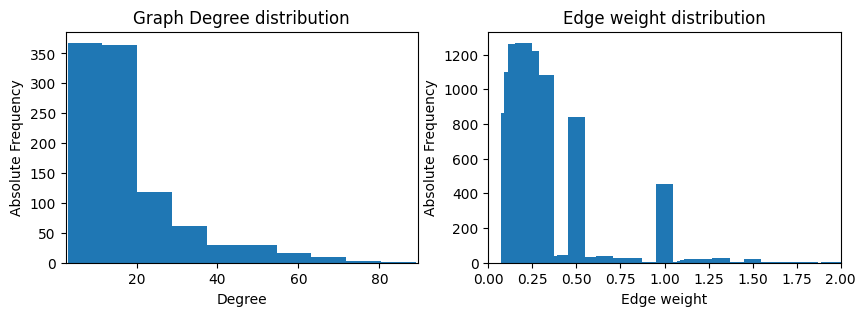

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

axes[0].set_xlim([min(degrees_avg)-0.5, max(degrees_avg)+0.5])
axes[0].set_xlabel("Degree")
axes[0].set_ylabel("Absolute Frequency")
axes[0].hist(degrees_avg)
axes[0].set_title('Graph Degree distribution')

axes[1].set_xlim(min(bin_edges_W), max(bin_edges_W))
axes[1].set_xlabel("Edge weight")
axes[1].set_ylabel("Absolute Frequency")
axes[1].bar(bin_edges_W[:-1], hist_W/10, width = 0.1)
axes[1].set_title('Edge weight distribution')
#csoportméreteloszlás


plt.show()

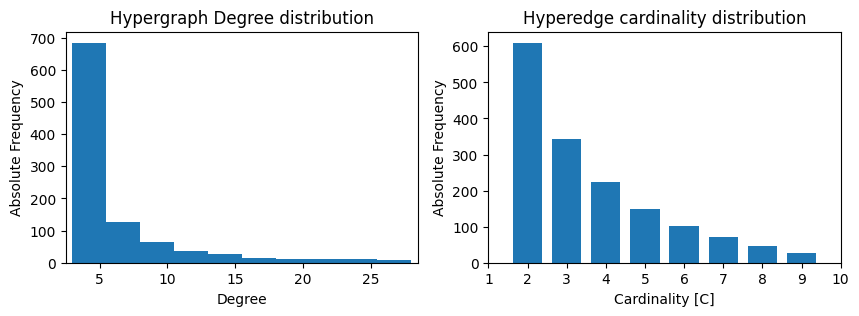

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

axes[0].set_xlim([min(h_degrees_avg)-0.5, max(h_degrees_avg)+0.5])
axes[0].set_xlabel("Degree")
axes[0].set_ylabel("Absolute Frequency")
axes[0].hist(h_degrees_avg)
axes[0].set_title('Hypergraph Degree distribution')

axes[1].set_xlim(min(bin_edges_S), max(bin_edges_S))
axes[1].set_xlabel("Cardinality [C]")
axes[1].set_ylabel("Absolute Frequency") #x ticks be the bins 
axes[1].set_xticks(bin_edges_S)
axes[1].bar(bin_edges_S[:-1], hist_S/10,  width = 0.75)
axes[1].set_title('Hyperedge cardinality distribution')

#csoportméreteloszlás


plt.show()

In [14]:
h_degrees_avg[1]

28.0

In [15]:
max_mid

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [16]:
MAX_COMM_SIZES

{3: array([9.938e-01, 9.938e-01, 9.938e-01, 9.938e-01, 9.938e-01, 9.938e-01,
        9.938e-01, 9.888e-01, 9.758e-01, 9.369e-01, 8.294e-01, 8.294e-01,
        8.294e-01, 3.847e-01, 3.742e-01, 3.622e-01, 3.512e-01, 3.560e-02,
        3.450e-02, 3.040e-02, 2.930e-02, 2.680e-02, 2.670e-02, 2.530e-02,
        2.450e-02, 1.000e-02, 1.000e-02, 9.500e-03, 9.400e-03, 9.400e-03,
        9.100e-03, 8.700e-03, 8.200e-03, 8.100e-03, 7.200e-03, 7.000e-03,
        6.800e-03, 6.600e-03, 5.900e-03, 5.900e-03, 5.900e-03, 5.900e-03,
        5.400e-03, 5.400e-03, 5.300e-03, 5.200e-03, 5.000e-03, 5.000e-03,
        4.900e-03, 4.900e-03, 3.400e-03, 3.400e-03, 3.400e-03, 3.400e-03,
        3.400e-03, 3.400e-03, 3.400e-03, 3.400e-03, 3.300e-03, 3.300e-03,
        2.900e-03, 2.900e-03, 2.900e-03, 2.400e-03, 2.400e-03, 2.400e-03,
        2.400e-03, 1.800e-03, 1.800e-03, 1.800e-03, 1.800e-03, 1.800e-03,
        1.800e-03, 1.500e-03, 1.500e-03, 9.000e-04, 9.000e-04, 9.000e-04,
        6.000e-04, 6.000e-04, 6.000

In [17]:
MAX_ERR[3]

array([0.00370945, 0.00370945, 0.00370945, 0.00370945, 0.00370945,
       0.00370945, 0.00370945, 0.00404475, 0.00561783, 0.00772593,
       0.02161574, 0.02161574, 0.02161574, 0.10953908, 0.11449437,
       0.10786454, 0.11717747, 0.01105622, 0.00983107, 0.00830903,
       0.00778524, 0.00487442, 0.0049    , 0.00460543, 0.00434166,
       0.00184391, 0.00184391, 0.00180278, 0.00162481, 0.00162481,
       0.00181384, 0.0020025 , 0.00208806, 0.00202237, 0.0018868 ,
       0.00189737, 0.00177764, 0.00185472, 0.00175784, 0.00175784,
       0.00175784, 0.00175784, 0.00149666, 0.00149666, 0.00155242,
       0.00132665, 0.00141421, 0.00141421, 0.00137477, 0.00137477,
       0.00128062, 0.00128062, 0.00128062, 0.00128062, 0.00128062,
       0.00128062, 0.00128062, 0.00128062, 0.00126886, 0.00126886,
       0.00104403, 0.00104403, 0.00104403, 0.0012    , 0.0012    ,
       0.0012    , 0.0012    , 0.00146969, 0.00146969, 0.00146969,
       0.00146969, 0.00146969, 0.00146969, 0.0015    , 0.0015 

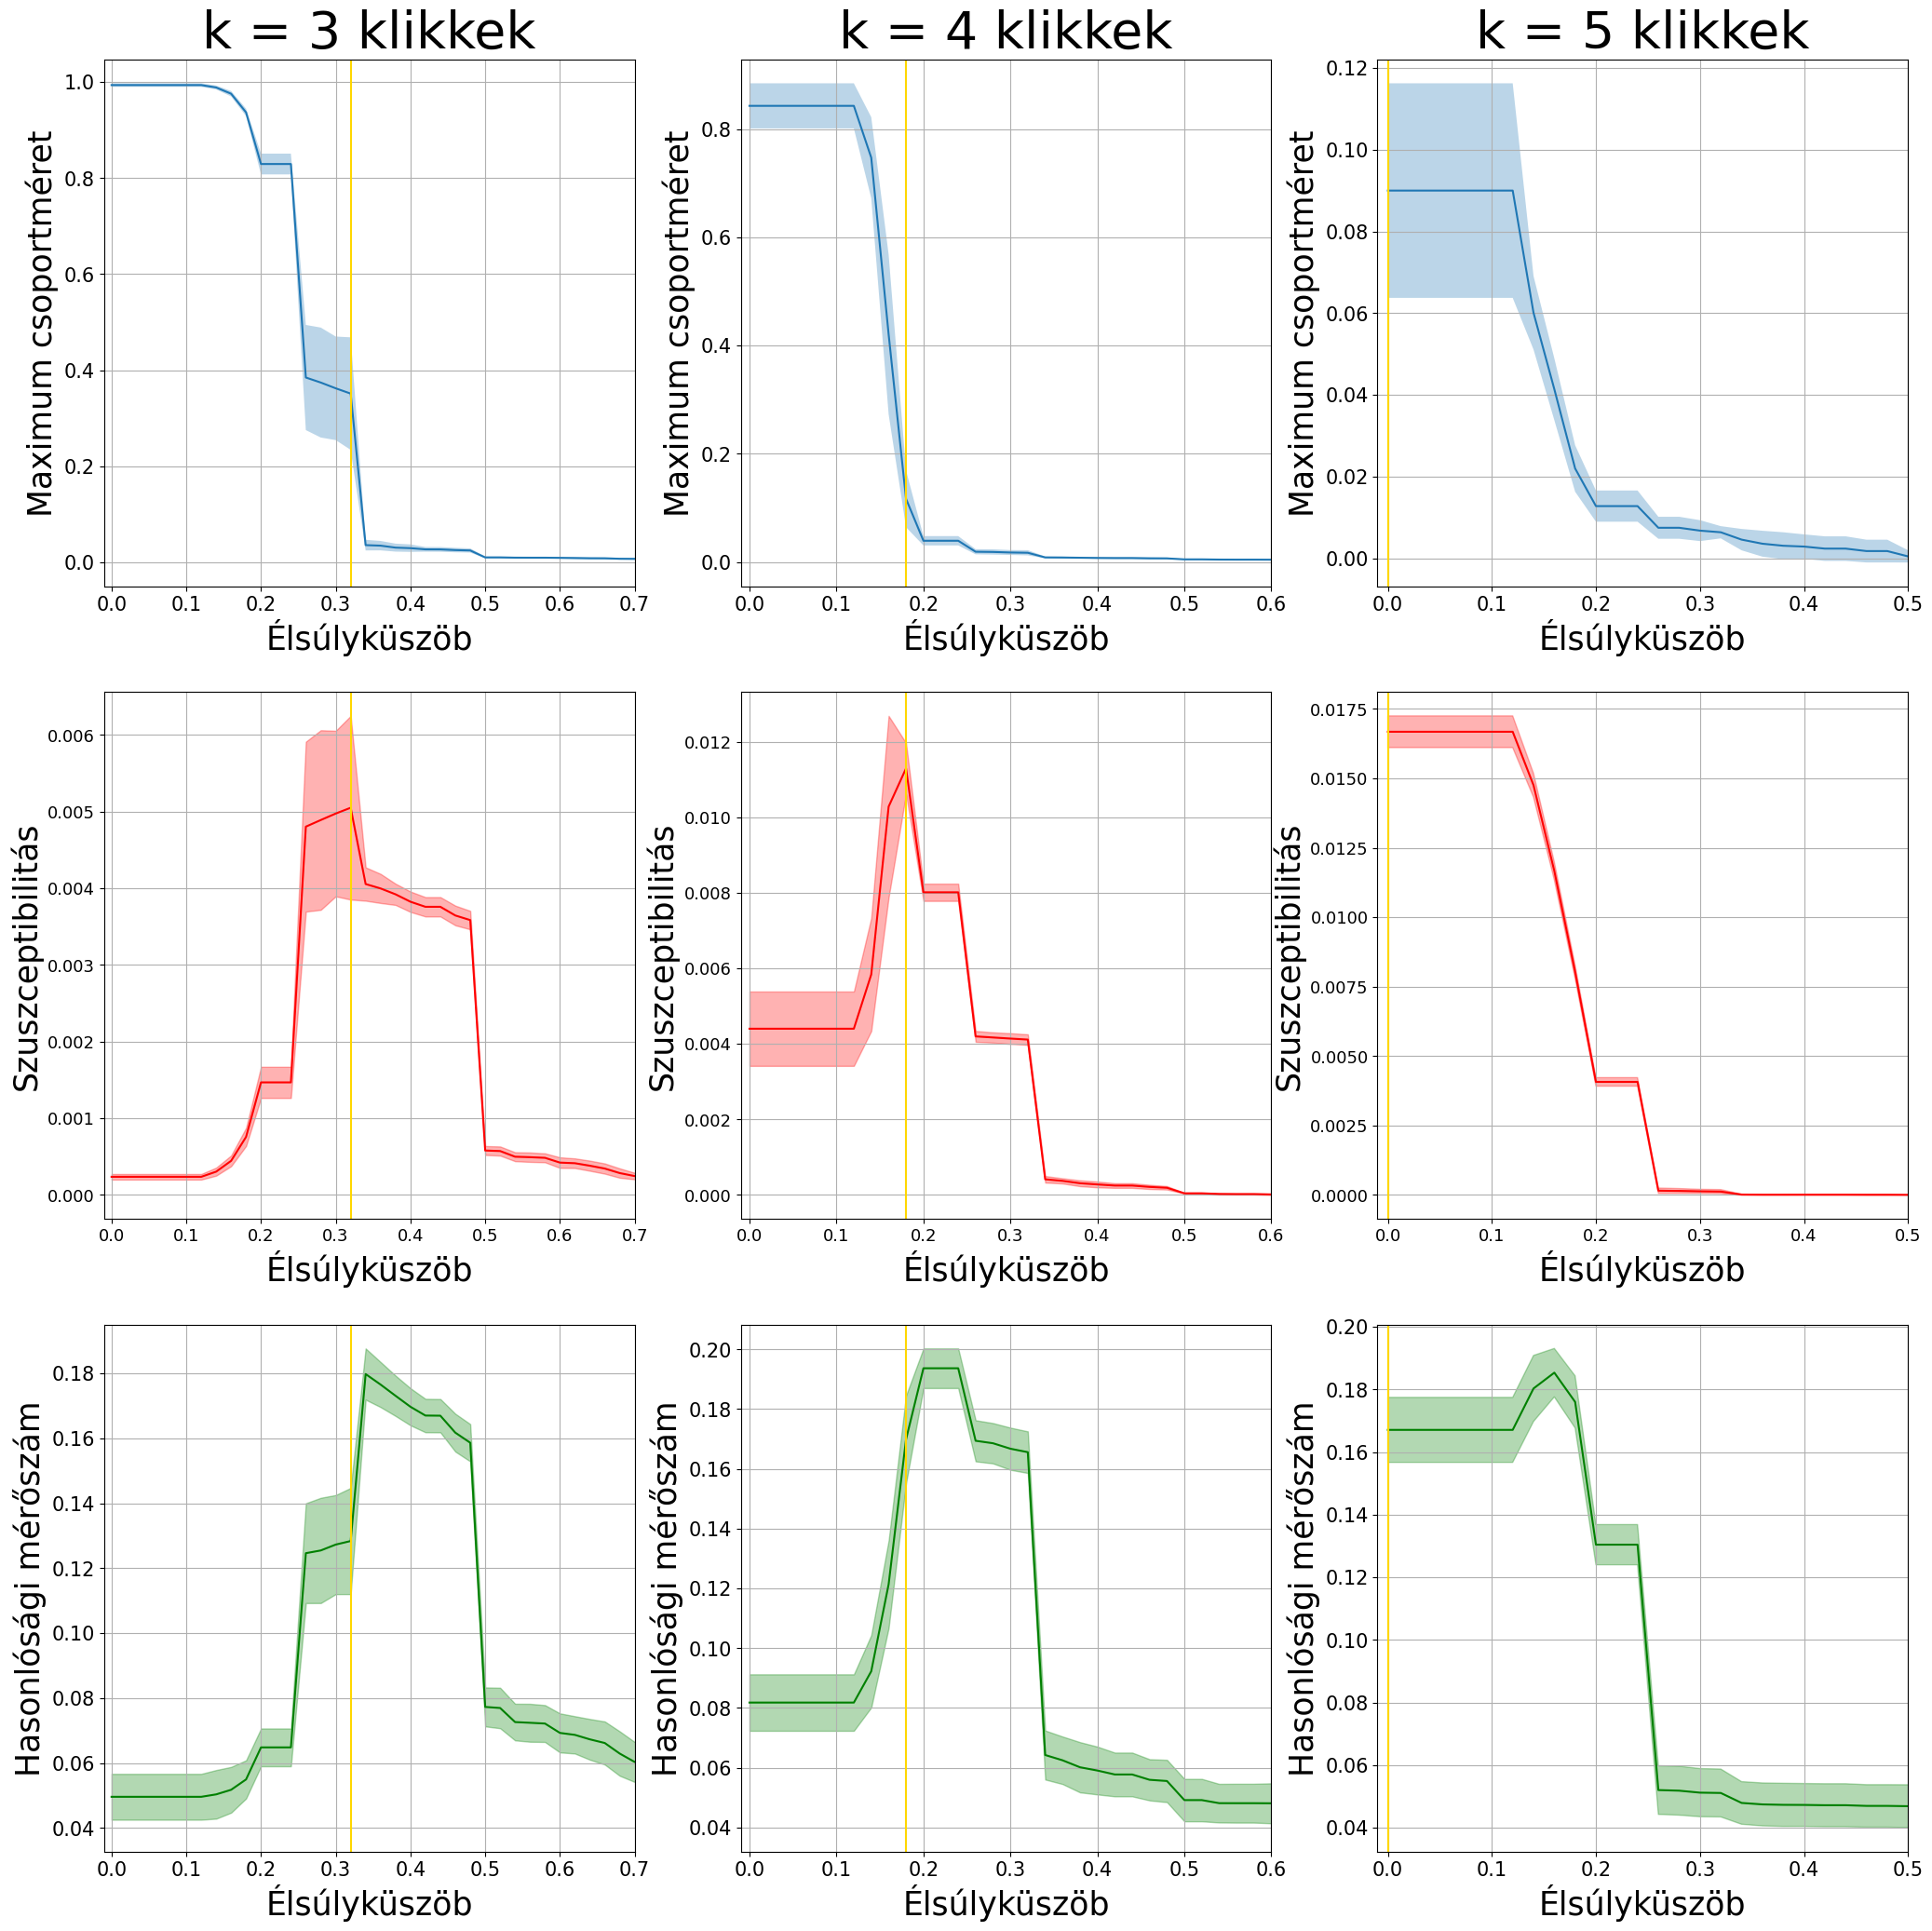

In [18]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25, 25))

#axes[0][0].plot(weightlist, MAX_COMM_SIZES[2])
axes[0][0].plot(weightlist, MAX_COMM_SIZES[3])
axes[0][0].fill_between(weightlist, MAX_COMM_SIZES[3] - MAX_ERR[3], MAX_COMM_SIZES[3] + MAX_ERR[3], alpha=0.3)
axes[0][0].set_ylabel("Maximum csoportméret", fontsize = 25)
axes[0][0].set_xlabel("Élsúlyküszöb", fontsize = 25)
axes[0][0].set_xlim(-0.01,0.7)
axes[0][0].tick_params(axis='both', labelsize=15)
axes[0][0].set_title('k = 3 klikkek', fontsize = 40)
axes[0][0].axvline(x=weightlist[np.argmax(SUSCEPTIBILITIES[3])], color="gold")
axes[0][0].grid(True)

axes[0][1].plot(weightlist, MAX_COMM_SIZES[4])
axes[0][1].fill_between(weightlist, MAX_COMM_SIZES[4] - MAX_ERR[4], MAX_COMM_SIZES[4] + MAX_ERR[4], alpha=0.3)
axes[0][1].set_ylabel("Maximum csoportméret", fontsize = 25)
axes[0][1].set_xlabel("Élsúlyküszöb", fontsize = 25)
axes[0][1].set_xlim(-0.01,0.6)
axes[0][1].tick_params(axis='both', labelsize=15)
axes[0][1].set_title('k = 4 klikkek', fontsize = 40)
axes[0][1].axvline(x=weightlist[np.argmax(SUSCEPTIBILITIES[4])], color="gold")
axes[0][1].grid(True)

axes[0][2].plot(weightlist, MAX_COMM_SIZES[5] )
axes[0][2].fill_between(weightlist, MAX_COMM_SIZES[5] - MAX_ERR[5], MAX_COMM_SIZES[5] + MAX_ERR[5], alpha=0.3)
axes[0][2].set_ylabel("Maximum csoportméret", fontsize = 25)
axes[0][2].set_xlabel("Élsúlyküszöb", fontsize = 25)
axes[0][2].set_xlim(-0.01,0.5)
axes[0][2].tick_params(axis='both', labelsize=15)
axes[0][2].set_title('k = 5 klikkek', fontsize = 40)
axes[0][2].axvline(x=weightlist[np.argmax(SUSCEPTIBILITIES[5])], color="gold")
axes[0][2].grid(True)

axes[1][0].plot(weightlist, SUSCEPTIBILITIES[3],  color="red")
axes[1][0].fill_between(weightlist, SUSCEPTIBILITIES[3] - SUSC_ERR[3], SUSCEPTIBILITIES[3] + SUSC_ERR[3],  color="red", alpha=0.3)
axes[1][0].set_ylabel("Szuszceptibilitás", fontsize = 25)
axes[1][0].set_xlabel("Élsúlyküszöb", fontsize = 25)
axes[1][0].set_xlim(-0.01,0.7)
axes[1][0].tick_params(axis='both', labelsize=13)
#axes[1][0].set_yticks(fontsize = 15)
#axes[1][0].set_title('Susceptibilities with k = 3')
axes[1][0].axvline(x=weightlist[np.argmax(SUSCEPTIBILITIES[3])], color="gold")
axes[1][0].grid(True)

axes[1][1].plot(weightlist, SUSCEPTIBILITIES[4], color="red")
axes[1][1].fill_between(weightlist, SUSCEPTIBILITIES[4] - SUSC_ERR[4], SUSCEPTIBILITIES[4] + SUSC_ERR[4],  color="red", alpha=0.3)
axes[1][1].set_ylabel("Szuszceptibilitás", fontsize = 25)
axes[1][1].set_xlabel("Élsúlyküszöb", fontsize = 25)
axes[1][1].set_xlim(-0.01,0.6)
axes[1][1].tick_params(axis='both', labelsize=13)
#axes[1][1].set_title('Susceptibilities with k = 4')
axes[1][1].axvline(x=weightlist[np.argmax(SUSCEPTIBILITIES[4])], color="gold")
axes[1][1].grid(True)

axes[1][2].plot(weightlist, SUSCEPTIBILITIES[5],  color="red")
axes[1][2].fill_between(weightlist, SUSCEPTIBILITIES[5] - SUSC_ERR[5], SUSCEPTIBILITIES[5] + SUSC_ERR[5],  color="red", alpha=0.3)
axes[1][2].set_ylabel("Szuszceptibilitás", fontsize = 25)
axes[1][2].set_xlabel("Élsúlyküszöb", fontsize = 25)
axes[1][2].set_xlim(-0.01,0.5)
axes[1][2].tick_params(axis='both', labelsize=13)
#axes[1][2].set_title('Susceptibilities with k = 5')
axes[1][2].axvline(x=weightlist[np.argmax(SUSCEPTIBILITIES[5])], color="gold")
axes[1][2].grid(True)

axes[2][0].plot(weightlist, ELEMENT_C_SIMILARITIES[3], color="green")
axes[2][0].fill_between(weightlist, ELEMENT_C_SIMILARITIES[3] - ELEMENT_ERR[3], ELEMENT_C_SIMILARITIES[3] + ELEMENT_ERR[3],  color="green", alpha=0.3)
axes[2][0].set_ylabel("Hasonlósági mérőszám", fontsize = 25)
axes[2][0].set_xlabel("Élsúlyküszöb", fontsize = 25)
axes[2][0].set_xlim(-0.01,0.7)
axes[2][0].tick_params(axis='both', labelsize=15)
#axes[2][0].set_title('Element centric similarities with k = 3')
axes[2][0].axvline(x=weightlist[np.argmax(SUSCEPTIBILITIES[3])], color="gold")
axes[2][0].grid(True)

axes[2][1].plot(weightlist, ELEMENT_C_SIMILARITIES[4], color="green")
axes[2][1].fill_between(weightlist, ELEMENT_C_SIMILARITIES[4] - ELEMENT_ERR[4], ELEMENT_C_SIMILARITIES[4] + ELEMENT_ERR[4],  color="green", alpha=0.3)
axes[2][1].set_ylabel("Hasonlósági mérőszám", fontsize = 25)
axes[2][1].set_xlabel("Élsúlyküszöb", fontsize = 25)
axes[2][1].set_xlim(-0.01,0.6)
axes[2][1].tick_params(axis='both', labelsize=15)
#axes[2][1].set_title('Element centric similarities with k = 4')
axes[2][1].axvline(x=weightlist[np.argmax(SUSCEPTIBILITIES[4])], color="gold")
axes[2][1].grid(True)

axes[2][2].plot(weightlist, ELEMENT_C_SIMILARITIES[5],  color="green")
axes[2][2].fill_between(weightlist, ELEMENT_C_SIMILARITIES[5] - ELEMENT_ERR[5], ELEMENT_C_SIMILARITIES[5] + ELEMENT_ERR[5],  color="green", alpha=0.3)
axes[2][2].set_ylabel("Hasonlósági mérőszám", fontsize = 25)
axes[2][2].set_xlabel("Élsúlyküszöb", fontsize = 25)
axes[2][2].set_xlim(-0.01,0.5)
axes[2][2].tick_params(axis='both', labelsize=15)
#axes[2][2].set_title('Element centric similarities with k = 5')
axes[2][2].axvline(x=weightlist[np.argmax(SUSCEPTIBILITIES[5])], color="gold")
axes[2][2].grid(True)


#axes.set_title('Variables considering k-s from 2 to 4 in k_clique percolation')


In [19]:
max(ELEMENT_C_SIMILARITIES[4])

0.1936697782569183

In [20]:
MAX_ERR

{3: array([0.00370945, 0.00370945, 0.00370945, 0.00370945, 0.00370945,
        0.00370945, 0.00370945, 0.00404475, 0.00561783, 0.00772593,
        0.02161574, 0.02161574, 0.02161574, 0.10953908, 0.11449437,
        0.10786454, 0.11717747, 0.01105622, 0.00983107, 0.00830903,
        0.00778524, 0.00487442, 0.0049    , 0.00460543, 0.00434166,
        0.00184391, 0.00184391, 0.00180278, 0.00162481, 0.00162481,
        0.00181384, 0.0020025 , 0.00208806, 0.00202237, 0.0018868 ,
        0.00189737, 0.00177764, 0.00185472, 0.00175784, 0.00175784,
        0.00175784, 0.00175784, 0.00149666, 0.00149666, 0.00155242,
        0.00132665, 0.00141421, 0.00141421, 0.00137477, 0.00137477,
        0.00128062, 0.00128062, 0.00128062, 0.00128062, 0.00128062,
        0.00128062, 0.00128062, 0.00128062, 0.00126886, 0.00126886,
        0.00104403, 0.00104403, 0.00104403, 0.0012    , 0.0012    ,
        0.0012    , 0.0012    , 0.00146969, 0.00146969, 0.00146969,
        0.00146969, 0.00146969, 0.00146969, 0

In [21]:
len(weightlist)

101

In [22]:
plt.plot(weightlist, MAX_COMM_SIZES[2])

KeyError: 2

In [ ]:
np.argmax(SUSCEPTIBILITIES[2])

39

In [ ]:
SUSCEPTIBILITIES[2][39]

3175.515463917526

In [ ]:
weightlist[np.argmax(SUSCEPTIBILITIES[2])]

0.78